In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from numpy.linalg import inv,qr
from sklearn.datasets import load_iris
%matplotlib inline

In [14]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
label                150
dtype: int64

In [17]:
df.columns = ['sepal length','sepal width','petal length','petal width','label']#花萼长度，花萼宽度，花瓣长度，花瓣宽度等4个用于识别鸢尾花的属性
df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [18]:
df.head(5)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


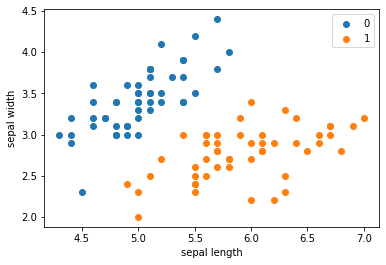

In [19]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label = '0')  #label = '0'图右上角的标记
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend() 

In [23]:
#本数据集共拥有三个种类，选出两个种类
data = np.array(df.iloc[:100,[0,1,-1]]) #注意不是冒号，[0,1,-1]是列排序，即分别选择第 0，1和最后一列，


    为了快速方便的创建数据集，此处采用 scikit-learn 里的 make_blobs
    
    make_blobs() 是 sklearn.datasets中的一个函数

    主要是产生聚类数据集，需要熟悉每个参数，继而更好的利用

In [109]:
from sklearn.datasets import make_blobs

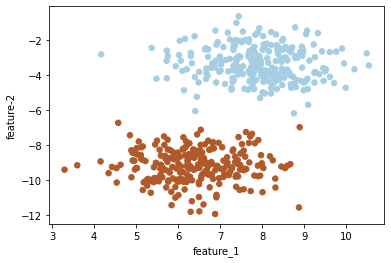

In [110]:
X, y = make_blobs(n_samples=500, centers=2, random_state=6)
y[y==0] = -1
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel("feature_1")
plt.ylabel("feature-2")
plt.show()

##  感知机（采用原始形式）

In [132]:
class PerceptronRaw():
    def __init__(self):
        self.W = None
        self.bias = None
        
    def fit(self, x_train, y_train, learning_rate = 0.05, n_iters=100, plot_train=True):
        print("Start Training:")
        num_samples, num_features = x_train.shape
        self.W = np.random.randn(num_features)
        self.bias = 0
        
        while True:
            #直到全部分类正确
            errors_examples = []
            errors_examples_y = []
            #误分类点
            for idx in range(num_samples):
                example = x_train[idx]
                y_idx = y_train[idx]
                
                #count distance
                distance = y_idx * (np.dot(example, self.W) + self.bias)
                #将误分类点收集起来
                if distance <= 0:
                    errors_examples.append(example)
                    errors_examples_y.append(y_idx)
            if len(errors_examples) == 0:
                break
            else:
                # 随机选择一个错误分类点，修正参数
                random_idx = np.random.randint(0, len(errors_examples))
                choosed_example = errors_examples[random_idx]
                choosed_example_y = errors_examples_y[random_idx]
                self.W = self.W + learning_rate * choosed_example_y * choosed_example
                self.bias = self.bias + learning_rate * choosed_example_y
        print("Training is Over.")
        
        # 绘制训练结果部分
        if plot_train is True:
            x_hpyerplane = np.linspace(0, 10, 10)
            slope = -self.W[0] / self.W[1]
            intercept = -self.bias/self.W[1]
            y_hpyerplane = slope * x_hpyerplane + intercept#
            
            plt.xlabel("feature_1")
            plt.ylabel("feature_2")
            plt.xlim((2, 10))
            #这里有时候需要调整区间
            plt.ylim((-12, 4))
            plt.title("Dataset and Decision in Training(Raw)")
            plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
            plt.plot(x_hpyerplane, y_hpyerplane, color='g', label='Decision_Raw')
            plt.legend(loc='upper left')
            plt.show()
            
    def predict(self, x):
        if self.W is None or self.bias is None:
            raise NameError("Model is not trained")
        y_predict = np.sign(np.dot(x, self.W) + sefl.bias)
        return y_predict

In [133]:
X.shape

(500, 2)

In [134]:
y.shape

(500,)

In [135]:
X_train = X[0:450]
y_train = y[0:450]
X_test = X[450:500]
y_test = y[450:500]

Start Training:
Training is Over.


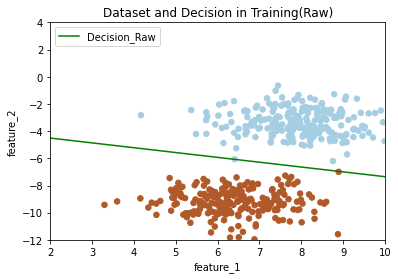

In [136]:
model_raw = PerceptronRaw()

model_raw.fit(X_train, y_train)

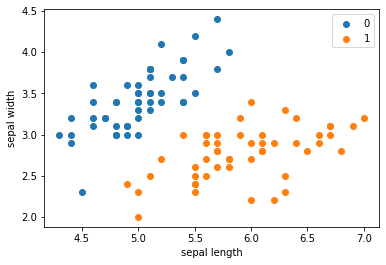

In [137]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label = '0')  #label = '0'图右上角的标记
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()         #给图加上图例

In [138]:
#采用鸢尾花数据
df.shape

(150, 5)

In [139]:
data.shape

(100, 3)

In [140]:
X_flower = np.array(df.iloc[:100, [0,1]])
y_flower = np.array(df.iloc[:100, [-1]])
y_flower[y_flower==0] = -1

Start Training:
Training is Over.


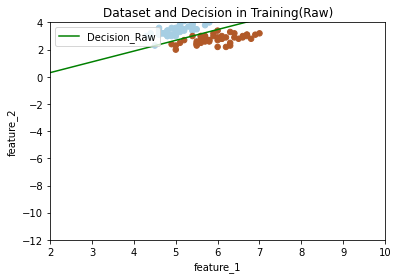

In [141]:
model_raw = PerceptronRaw()

model_raw.fit(X_flower, y_flower)

In [142]:
model_raw.W

array([ 3.26068073, -4.11408057])

In [143]:
model_raw.bias

array([-5.25])

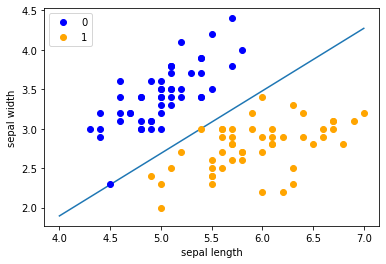

In [144]:
x_points = np.linspace(4,7,10)  # 4-7  十等分
# 分类点到超平面的距离
y_ = -(model_raw.W[0]*x_points + model_raw.bias) / model_raw.W[1]  #因为w*x+b=0公式展开，P36手写
plt.plot(x_points,y_)

plt.plot(data[:50,0],data[:50,1],'bo',color = 'blue',label = '0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color = 'orange',label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 感知机（采用对偶形式）

In [145]:
class PerceptronDuality():
    def __init__(self):
        self.alpha = None
        self.bias = None
        self.W = None
        
    def fit(self, x_train, y_train, learning_rate=1, n_iters=100, plot_train=True):
        print("开始训练...")
        num_samples, num_features = x_train.shape
        self.alpha = np.zeros((num_samples,))
        self.bias = 0
        
        # 计算 Gram 矩阵
        gram = np.dot(x_train, x_train.T)
        
        while True:
            error_count = 0
            for idx in range(num_samples):
                inner_product = gram[idx]
                y_idx = y_train[idx]
                distance = y_idx * (np.sum(self.alpha * y_train * inner_product) + self.bias)
                # 如果有分类错误点，修正 alpha 和 bias，跳出本层循环，重新遍历数据计算，开始新的循环
                if distance <= 0:
                    error_count += 1
                    self.alpha[idx] = self.alpha[idx] + learning_rate
                    self.bias = self.bias + learning_rate * y_idx
                    break  
            # 数据没有错分类点，跳出 while 循环
            if error_count == 0:
                break
        self.W = np.sum(self.alpha * y_train * x_train.T, axis=1)       
        print("训练结束")
    
    # 绘制训练结果部分
        if plot_train is True:
            x_hyperplane = np.linspace(2, 10, 8)           
            slope = -self.W[0]/self.W[1]
            intercept = -self.bias/self.W[1]
            y_hpyerplane = slope * x_hyperplane + intercept

            plt.xlabel("feature_1")
            plt.ylabel("feature_2")
            plt.xlim((2, 10))
            plt.ylim((-12, 0))
            plt.title("Dataset and Decision in Training(Duality)")
            plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
            plt.plot(x_hyperplane, y_hpyerplane, color='g', label='Decision_Duality')
            plt.legend(loc='upper left')
            plt.show()
    
    def predict(self, x):
        if self.alpha is None or self.bias is None:
            raise NameError("模型未训练")
        y_predicted = np.sign(np.dot(x, self.W) + self.bias)
        return y_predicted

开始训练...
训练结束


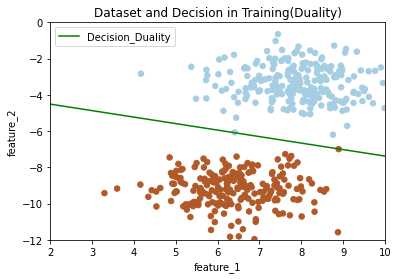

In [149]:
model_duality = PerceptronDuality()
model_duality.fit(X_train, y_train)

In [150]:
y_predict_duality = model_duality.predict(X_test)
accuracy_duality = np.sum(y_predict_duality == y_test) / y_test.shape[0]

print("对偶形式模型在测试集上的准确率: {0}".format(accuracy_duality))

对偶形式模型在测试集上的准确率: 1.0


    比较两个模型
    分别从原始模型和对偶模型中获取参数，可以看出，这两个模型的分离超平面都不同，但是都能正确进行分类，这验证了总结中的结论。

    当训练当训练数据集线性可分的时候，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能不同，即存在多个分离超平面能把数据集分开。

In [151]:
print("原始形式模型参数:")
print("W: {0}, bias: {1}".format(model_raw.W, model_raw.bias))
print()
print("对偶形式模型参数:")
print("W: {0}, bias: {1}".format(model_duality.W, model_duality.bias))

原始形式模型参数:
W: [ 3.26068073 -4.11408057], bias: [-5.25]

对偶形式模型参数:
W: [-25.35285228 -70.71533848], bias: -268
